In [1]:
import sys
!{sys.executable} -m pip install ndjson

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import json, ndjson, io
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageDraw

In [49]:
file = "penis-simplified.ndjson"
dataset = ['penis-simplified']

labels, dataset_name = dataset, 'penises'

drawings = []

with open('penis_simplified.ndjson') as f:
    print(type(f))
    data = ndjson.load(f)    
    print(len(data))
    for num in range(10):
        drawings.append(data[num])

drawing = data[14000]
print(type(drawing))
print(drawing['drawing'])
print(type(drawing['drawing']))

<class '_io.TextIOWrapper'>
25209
<class 'dict'>
[[[12, 1, 0, 7, 15, 22, 42, 67, 71, 73, 65, 59, 62, 65, 77, 92, 104, 107, 117, 120, 119, 111, 110, 120, 131, 143, 184, 195, 207, 208, 201], [0, 44, 74, 89, 96, 99, 99, 87, 79, 50, 65, 108, 208, 221, 242, 252, 255, 255, 242, 227, 175, 132, 58, 92, 111, 117, 119, 107, 77, 24, 4]]]
<class 'list'>


In [41]:
def convert(line):
  """Converts single JSON line and converts 'drawing' to list of np.array."""
  print(type(line))
  line = line.replace("\'", "\"")
  print(line)
  d = json.loads(line)
  print(d)
  d['drawing'] = [np.array(stroke) for stroke in d['drawing']]
  return d

In [42]:
def showimg(img):
  if isinstance(img, np.ndarray):
    img = list(Image.fromarray(img, 'L'))
  print(img)
  b = io.BytesIO()
  img.convert('RGB').save(b, format='png')
  enc = base64.b64encode(b.getvalue()).decode('utf-8')
  display.display(display.HTML(
      '<img src="data:image/png;base64,%s">' % enc))

In [43]:
showimg(convert(drawing))

<class 'dict'>


AttributeError: 'dict' object has no attribute 'replace'

In [81]:
def dict_to_img(drawing, img_sz=512, lw=3, maximize=True):

  print(drawing)
  img = Image.new('L', (img_sz, img_sz))
  draw = ImageDraw.Draw(img)

  lines = np.array([
      stroke[0:2, i:i+2]
      for stroke in drawing['drawing']
      for i in range(stroke.shape[1] - 1)
  ], dtype=np.float32)
  if maximize:
    for i in range(2):
      min_, max_ = lines[:,i,:].min() * 0.95, lines[:,i,:].max() * 1.05
      lines[:,i,:] = (lines[:,i,:] - min_) / max(max_ - min_, 1)
  else:
    lines /= 1024
  for line in lines:
    draw.line(tuple(line.T.reshape((-1,)) * img_sz), fill='white', width=lw)
  showimg(img)
  #return img

In [84]:
dict_to_img(drawing)

{'word': 'penis', 'countrycode': None, 'timestamp': '2019-06-17T20:23:49.786Z', 'key_id': 43853, 'drawing': [[[12, 1, 0, 7, 15, 22, 42, 67, 71, 73, 65, 59, 62, 65, 77, 92, 104, 107, 117, 120, 119, 111, 110, 120, 131, 143, 184, 195, 207, 208, 201], [0, 44, 74, 89, 96, 99, 99, 87, 79, 50, 65, 108, 208, 221, 242, 252, 255, 255, 242, 227, 175, 132, 58, 92, 111, 117, 119, 107, 77, 24, 4]]]}


AttributeError: 'list' object has no attribute 'shape'

In [79]:
for i in range(len(drawings) -1):
    dict_to_img(drawings[i], img_sz=512, lw=3, maximize=True)

{'word': 'penis', 'countrycode': 'US', 'timestamp': '2018-10-09T00:21:52.337Z', 'key_id': 2081, 'drawing': [[[79, 80, 90, 97, 112, 125, 137, 171, 183, 188, 188, 184, 183, 177, 177, 177, 189, 213, 235, 244, 253, 255, 253, 238, 199, 166, 108, 89, 61, 31, 9, 0, 0, 6, 17, 59, 74, 81], [165, 134, 80, 57, 27, 11, 2, 1, 5, 26, 89, 98, 134, 151, 165, 158, 148, 144, 149, 156, 172, 185, 199, 217, 233, 235, 230, 224, 222, 215, 195, 169, 155, 150, 148, 148, 152, 167]], [[162], [3]], [[162], [3]], [[158], [7]], [[158], [7]]]}


AttributeError: 'list' object has no attribute 'shape'

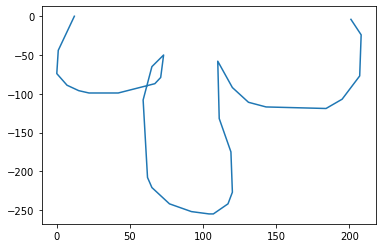

In [39]:
for stroke in drawing:
  # Each array has X coordinates at [0, :] and Y coordinates at [1, :].
  plt.plot(np.array(stroke[0]), -np.array(stroke[1]))

In [10]:
def loaditer(name, unrecognized=False):
  """Returns iterable of drawings in specified file.

  Args:
    name: Name of the downloaded object (e.g. "elephant").
    unrecognized: Whether to include drawings that were not recognized
        by Google AI (i.e. the hard ones).
  """
  for line in tf.io.gfile.GFile('%s/%s.ndjson' % (data_path, name)):
    d = convert(line)  
    #if d['recognized'] or unrecognized:
    yield d

In [11]:
def loadn(name, n, unrecognized=False):
  """Returns list of drawings.
  
  Args:
    name: Name of the downloaded object (e.g. "elephant").
    n: Number of drawings to load.
    unrecognized: Whether to include drawings that were not recognized
        by Google AI (i.e. the hard ones).
  """
  it = loaditer(name, unrecognized=unrecognized)
  return list(itertools.islice(it, 0, n))

In [12]:
n = 500
print('Loading {} instances of "{}"...'.format(n, labels[0]), end='')
sample = loadn(labels[0], 100)
print('done.')

Loading 500 instances of "penis-simplified"...

NameError: name 'itertools' is not defined

In [8]:
rows, cols = len(labels), 3
# n_per_class = rows * cols // len(labels) + 1
drawings_list = [drawing for name in labels
                 for drawing in loadn(name, cols)]

NameError: name 'loadn' is not defined

In [ ]:
# Create mosaic of rendered images.
lw = 3
img_sz = 512
tableau = np.zeros((img_sz * rows, img_sz * cols), dtype=np.uint8)
for y in range(rows):
  for x in range(cols):
    i = y * cols + x
    img = dict_to_img(drawings_list[i], img_sz=img_sz, lw=lw, maximize=True)
    tableau[y*img_sz:(y+1)*img_sz,
            x*img_sz:(x+1)*img_sz] = np.asarray(img)

In [ ]:
showimg(tableau)
print('{} samples of : {}'.format(cols, ' '.join(labels)))